In [ ]:
# Data Collection
# Read the cvs file
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Example: Loading data from a CSV file
data = pd.read_csv('heart_disease_dataset.csv')
data.head()


Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75  Female          228             119          66  Current   
1   48    Male          204             165          62  Current   
2   53    Male          234              91          67    Never   
3   69  Female          192              90          72  Current   
4   62  Female          172             163          93    Never   

  Alcohol Intake  Exercise Hours Family History Diabetes Obesity  \
0          Heavy               1             No       No     Yes   
1            NaN               5             No       No      No   
2          Heavy               3            Yes       No     Yes   
3            NaN               4             No      Yes      No   
4            NaN               6             No      Yes      No   

   Stress Level  Blood Sugar Exercise Induced Angina   Chest Pain Type  \
0             8          119                     Yes   Atypical Angina   
1             9           70                     Yes    Typical Angina   
2             5          196                     Yes   Atypical Angina   
3             7          107                     Yes  Non-anginal Pain   
4             2          183                     Yes      Asymptomatic   

   Heart Disease  
0              1  
1              0  
2              1  
3              0  
4              0

In [ ]:
# Check and Remove missing values
data_cleaned = data.dropna()

# Check for missing values after removing them
missing_values = data_cleaned.isnull().sum()

# Display the count of missing values per column
print(missing_values)

Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induced Angina    0
Chest Pain Type            0
Heart Disease              0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_count = data_cleaned.duplicated().sum()

# Display the count of duplicate rows
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [ ]:
## Checking for inconsistent data entries in categorical column

# Example: Assuming 'Gender' is a column with inconsistent entries
data_cleaned['Gender'] = data_cleaned['Gender'].str.strip().str.capitalize()

# Convert categorical columns to consistent format if necessary
# Example: Convert 'Male'/'male'/'M' to 'Male'
data_cleaned['Gender'] = data_cleaned['Gender'].replace({'M': 'Male', 'F': 'Female'})

# Check and correct out-of-range values in numeric columns
# Example: Assuming 'Age' should be between 0 and 120
data_cleaned = data_cleaned[(data_cleaned['Age'] >= 0) & (data_cleaned['Age'] <= 120)]

# Check for and handle outliers (e.g., using Z-score or IQR method)
# Example: Detect outliers in 'Cholesterol' column using IQR
Q1 = data_cleaned['Cholesterol'].quantile(0.25)
Q3 = data_cleaned['Cholesterol'].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_cleaned['Cholesterol'] < (Q1 - 1.5 * IQR)) | (data_cleaned['Cholesterol'] > (Q3 + 1.5 * IQR)))
data_cleaned = data_cleaned[~outliers]

# Ensure correct data types
# Example: Convert 'Date' to datetime if present
if 'Date' in data_cleaned.columns:
    data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Final check of data quality issues
print("Final data types:")
print(data_cleaned.dtypes)
print("Final missing values per column:")
print(data_cleaned.isnull().sum())
print(f"Final number of duplicate rows: {data_cleaned.duplicated().sum()}")



Final data types:
Age                         int64
Gender                     object
Cholesterol                 int64
Blood Pressure              int64
Heart Rate                  int64
Smoking                    object
Alcohol Intake             object
Exercise Hours              int64
Family History             object
Diabetes                   object
Obesity                    object
Stress Level                int64
Blood Sugar                 int64
Exercise Induced Angina    object
Chest Pain Type            object
Heart Disease               int64
dtype: object
Final missing values per column:
Age                        0
Gender                     0
Cholesterol                0
Blood Pressure             0
Heart Rate                 0
Smoking                    0
Alcohol Intake             0
Exercise Hours             0
Family History             0
Diabetes                   0
Obesity                    0
Stress Level               0
Blood Sugar                0
Exercise Induc

In [ ]:
## Convert categorical column into numerical column:

from sklearn.preprocessing import LabelEncoder
# Print column names to check for discrepancies
print("Available columns in the DataFrame:")
print(data.columns)

# Check if the columns exist before applying transformations
categorical_columns = ['Gender', 'ChestPainType']  # Replace with actual column names

# Check for missing columns
missing_columns = [col for col in categorical_columns if col not in data.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Label Encoding (useful for ordinal categories)
    if 'Gender' in data.columns:
        label_encoder = LabelEncoder()
        data['Gender'] = label_encoder.fit_transform(data['Gender'])

    # One-Hot Encoding (useful for nominal categories)
    if 'ChestPainType' in data.columns:
        data = pd.get_dummies(data, columns=['ChestPainType'], drop_first=True)

    # Display the updated data
    print("Data after converting categorical columns to numerical:")
    print(data.head())

Available columns in the DataFrame:
Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')
Missing columns: ['ChestPainType']


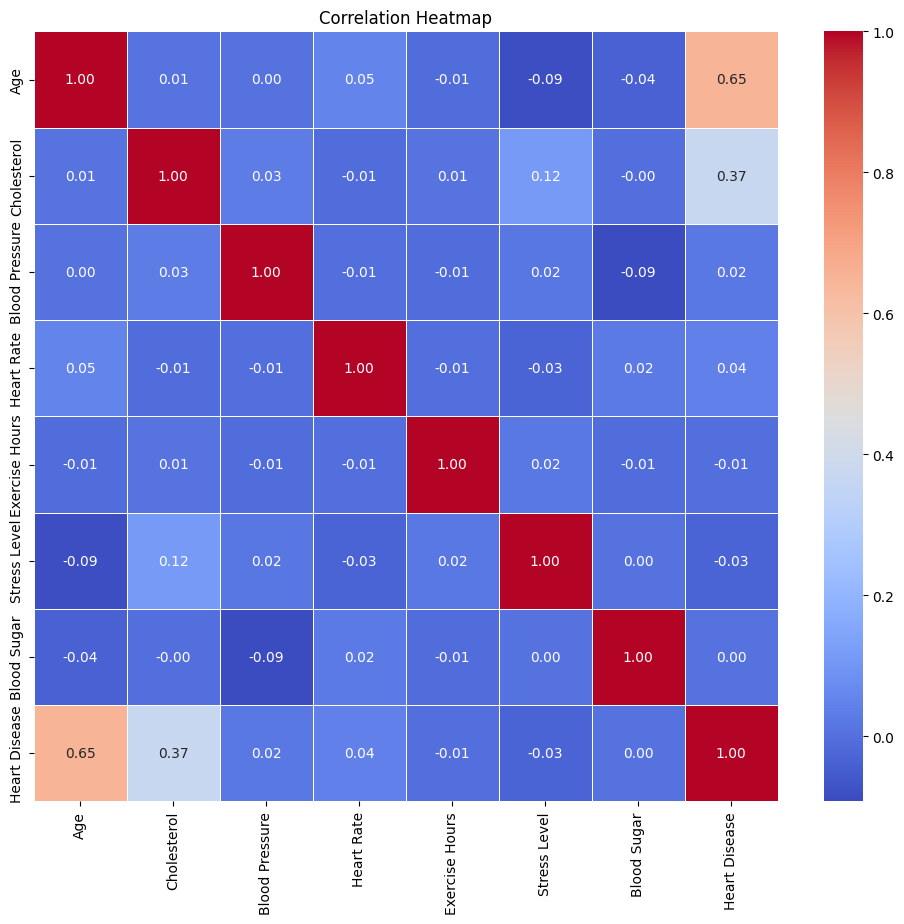

In [ ]:
# Correlation Heatmap:

import seaborn as sns
import matplotlib.pyplot as plt

# Ensure data_cleaned contains only numeric columns
numeric_data = data_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


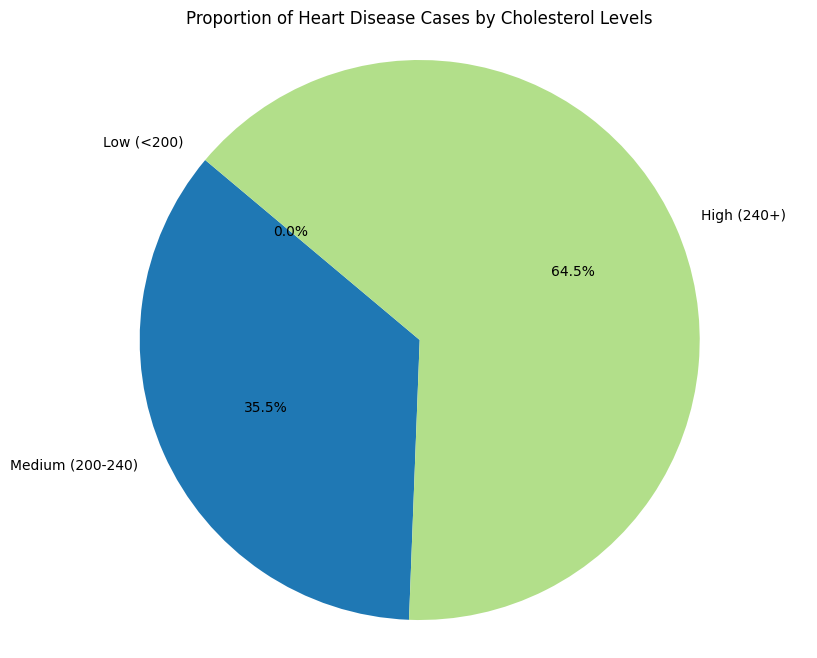

In [ ]:
## Data Visualization:

# Define cholesterol bins and labels
cholesterol_bins = [0, 200, 240, 300]
cholesterol_labels = ['Low (<200)', 'Medium (200-240)', 'High (240+)']

# Bin cholesterol levels
data_cleaned['CholesterolCategory'] = pd.cut(data_cleaned['Cholesterol'], bins=cholesterol_bins, labels=cholesterol_labels, right=False)

# Count the number of Heart Disease cases in each cholesterol category
cholesterol_category_counts = data_cleaned.groupby('CholesterolCategory')['Heart Disease'].sum()

# Prepare data for the pie chart
labels = cholesterol_category_counts.index
sizes = cholesterol_category_counts.values
colors = plt.cm.Paired(range(len(labels)))

# Plot
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Heart Disease Cases by Cholesterol Levels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


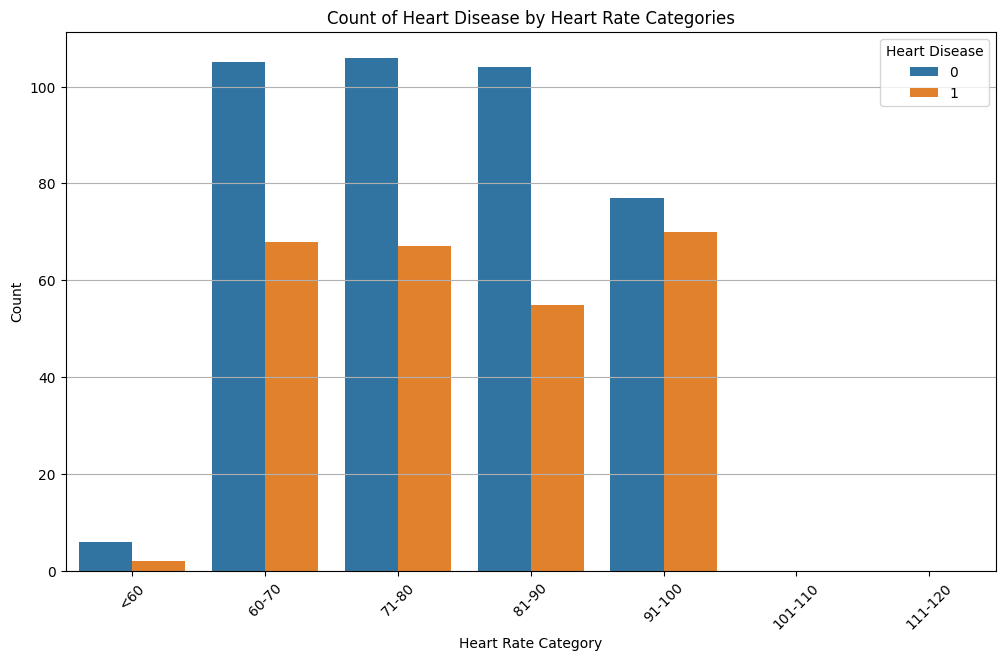

In [ ]:
# Create bins for 'Heart Rate' to categorize the data
bins = [0, 60, 70, 80, 90, 100, 110, 120]  # Define your own bins
labels = ['<60', '60-70', '71-80', '81-90', '91-100', '101-110', '111-120']
data_cleaned['HeartRateCategory'] = pd.cut(data_cleaned['Heart Rate'], bins=bins, labels=labels)

# Count occurrences of 'Heart Disease' for each 'HeartRateCategory'
bar_data = data_cleaned.groupby(['HeartRateCategory', 'Heart Disease']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='HeartRateCategory', y='Count', hue='Heart Disease', data=bar_data)
plt.title('Count of Heart Disease by Heart Rate Categories')
plt.xlabel('Heart Rate Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


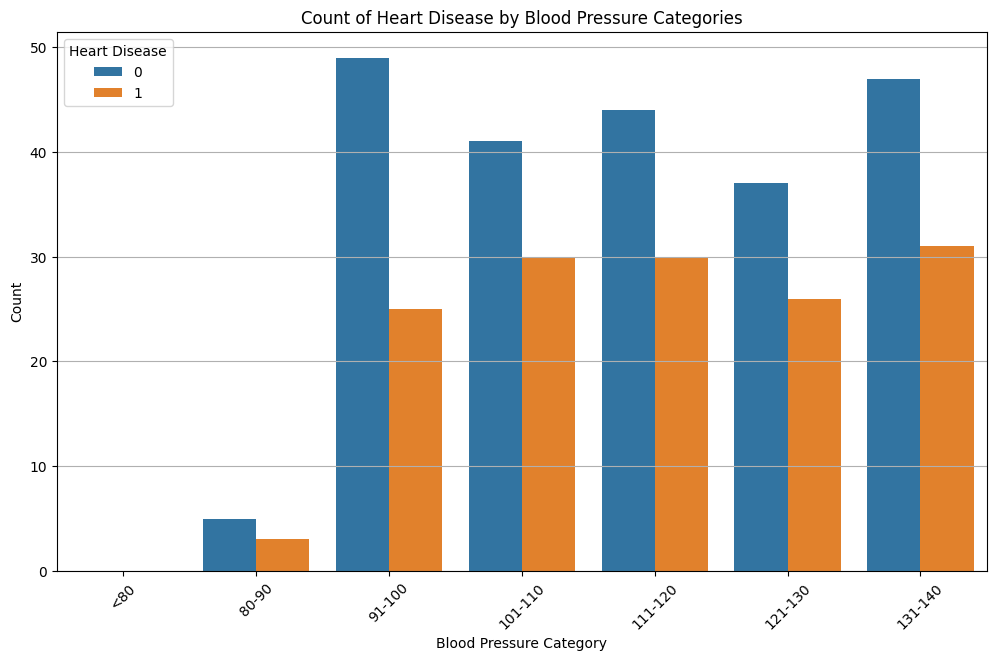

In [ ]:
# Create bins for 'Blood Pressure' to categorize the data
# Define your own bins and labels
bins = [0, 80, 90, 100, 110, 120, 130, 140]  # Adjust bins as needed
labels = ['<80', '80-90', '91-100', '101-110', '111-120', '121-130', '131-140']
data_cleaned['BloodPressureCategory'] = pd.cut(data_cleaned['Blood Pressure'], bins=bins, labels=labels)

# Count occurrences of 'Heart Disease' for each 'BloodPressureCategory'
bar_data = data_cleaned.groupby(['BloodPressureCategory', 'Heart Disease']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='BloodPressureCategory', y='Count', hue='Heart Disease', data=bar_data)
plt.title('Count of Heart Disease by Blood Pressure Categories')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


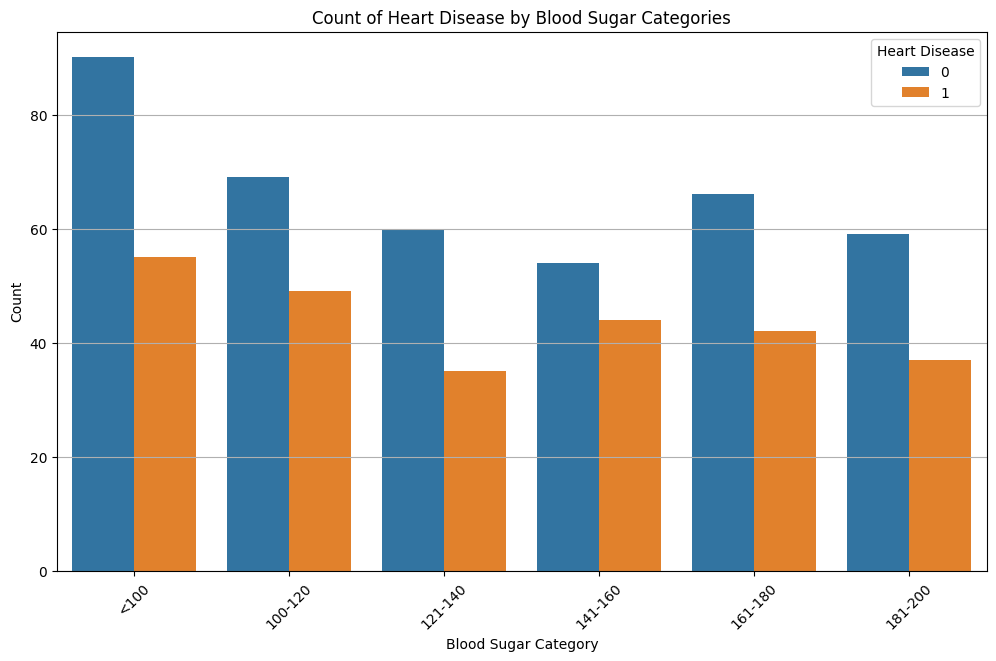

In [ ]:
# Create bins for 'Blood Sugar' to categorize the data
bins = [0, 100, 120, 140, 160, 180, 200]  # Define your own bins
labels = ['<100', '100-120', '121-140', '141-160', '161-180', '181-200']
data_cleaned['BloodSugarCategory'] = pd.cut(data_cleaned['Blood Sugar'], bins=bins, labels=labels)

# Count occurrences of 'Heart Disease' for each 'BloodSugarCategory'
bar_data = data_cleaned.groupby(['BloodSugarCategory', 'Heart Disease']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='BloodSugarCategory', y='Count', hue='Heart Disease', data=bar_data)
plt.title('Count of Heart Disease by Blood Sugar Categories')
plt.xlabel('Blood Sugar Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


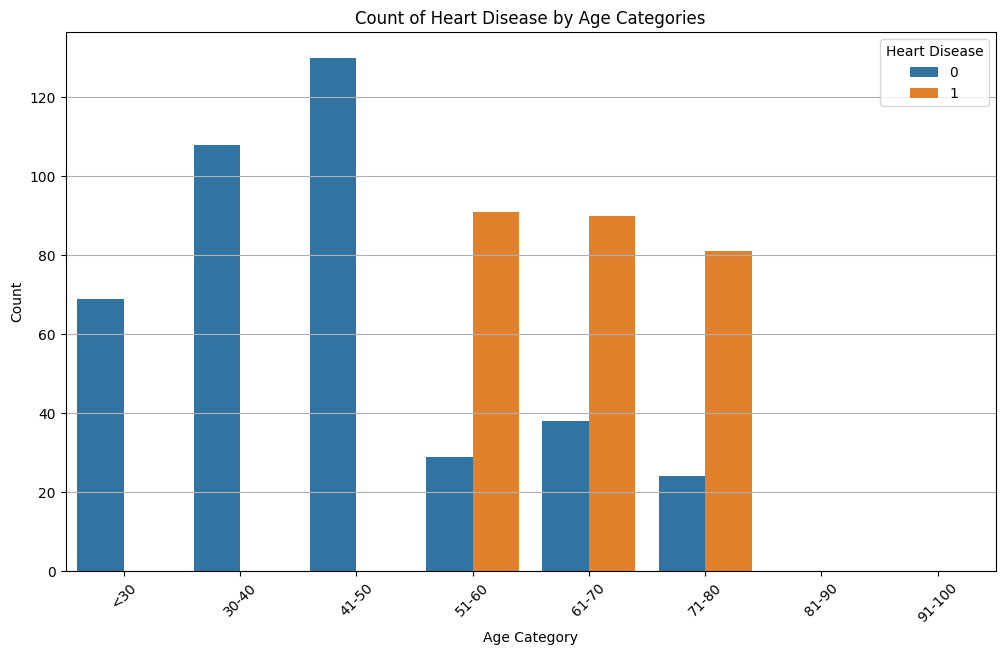

In [ ]:
# Create bins for 'Age' to categorize the data
bins = [0, 30, 40, 50, 60, 70, 80, 90, 100]  # Define your own bins
labels = ['<30', '30-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
data_cleaned['AgeCategory'] = pd.cut(data_cleaned['Age'], bins=bins, labels=labels)
# Count occurrences of 'Heart Disease' for each 'AgeCategory'
bar_data = data_cleaned.groupby(['AgeCategory', 'Heart Disease']).size().reset_index(name='Count')
# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(x='AgeCategory', y='Count', hue='Heart Disease', data=bar_data)
plt.title('Count of Heart Disease by Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Heart Disease')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
## Outlier Analysis:

from scipy import stats
# Detect and handle outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
numeric_columns = ['Cholesterol', 'HeartRate', 'BloodPressure']  # Update to correct names if necessary
for col in numeric_columns:
    if col in data_cleaned.columns:
        data_cleaned = detect_outliers_iqr(data_cleaned, col)
# Visualize outliers in the dataset
if 'Cholesterol' in data_cleaned.columns:
    sns.boxplot(data_cleaned['Cholesterol'])
    plt.title('Boxplot of Cholesterol')
    plt.show()
# Encode categorical columns
categorical_columns = ['Gender', 'ChestPainType']  # Replace with actual column names
if 'Gender' in data_cleaned.columns:
    label_encoder = LabelEncoder()
    data_cleaned['Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
if 'ChestPainType' in data_cleaned.columns:
    data_cleaned = pd.get_dummies(data_cleaned, columns=['ChestPainType'], drop_first=True)
# Display the updated data
print("Data after cleaning and encoding:")
print(data_cleaned.head())


Data after cleaning and encoding:
   Age  Gender  Cholesterol  Blood Pressure  Heart Rate  Smoking  \
0   75       0          228             119          66  Current   
2   53       1          234              91          67    Never   
6   64       0          211             105          86   Former   
7   60       0          208             148          83    Never   
8   37       0          317             137          66  Current   

  Alcohol Intake  Exercise Hours Family History Diabetes  ... Stress Level  \
0          Heavy               1             No       No  ...            8   
2          Heavy               3            Yes       No  ...            5   
6          Heavy               8            Yes      Yes  ...            2   
7       Moderate               4             No      Yes  ...            2   
8          Heavy               3             No      Yes  ...            5   

   Blood Sugar  Exercise Induced Angina   Chest Pain Type Heart Disease  \
0          11

Feature Importances:
          Feature  Importance
0             Age    0.645775
1     Cholesterol    0.334604
3     Blood Sugar    0.010071
2  Blood Pressure    0.009550


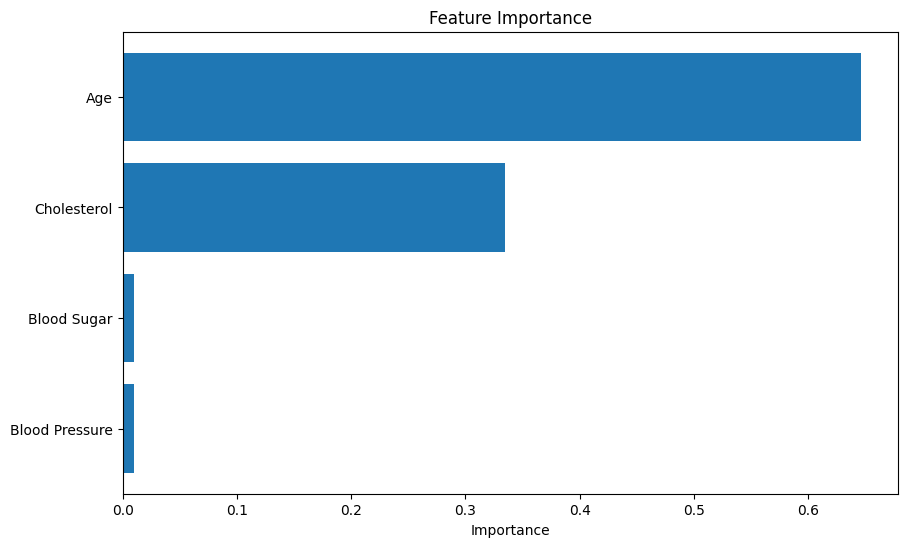

In [ ]:
## Feature Importance:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure','Blood Sugar']
target_column = 'Heart Disease'  # Replace with your actual target column name

# Check if the columns exist
for col in feature_columns + [target_column]:
    if col not in data.columns:
        raise ValueError(f"Column {col} not found in the dataset")

# Prepare features and target
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()


Model Accuracy:
0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       171
           1       0.84      0.78      0.81       129

    accuracy                           0.84       300
   macro avg       0.84      0.83      0.84       300
weighted avg       0.84      0.84      0.84       300



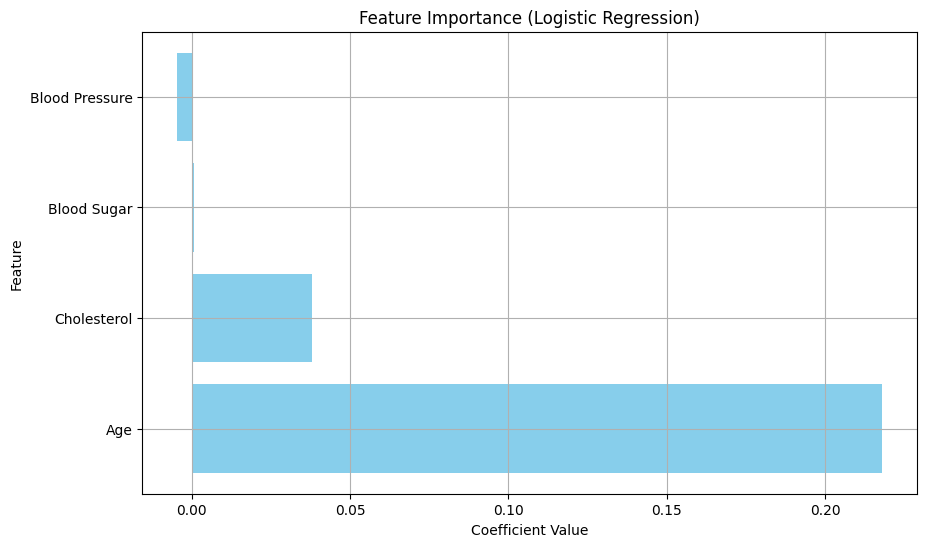

In [ ]:
## Classification Models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
# Define feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Ensure the target column exists
if target_column not in data.columns:
    raise ValueError(f"Target column {target_column} not found in the dataset")

# Prepare features and target
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the LogisticRegression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display coefficients for feature importance
coefficients = model.coef_[0]
feature_importances = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
# Plot feature coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance (Logistic Regression)')
plt.grid(True)
plt.show()


Model Accuracy:
0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       171
           1       0.84      0.78      0.81       129

    accuracy                           0.84       300
   macro avg       0.84      0.83      0.84       300
weighted avg       0.84      0.84      0.84       300



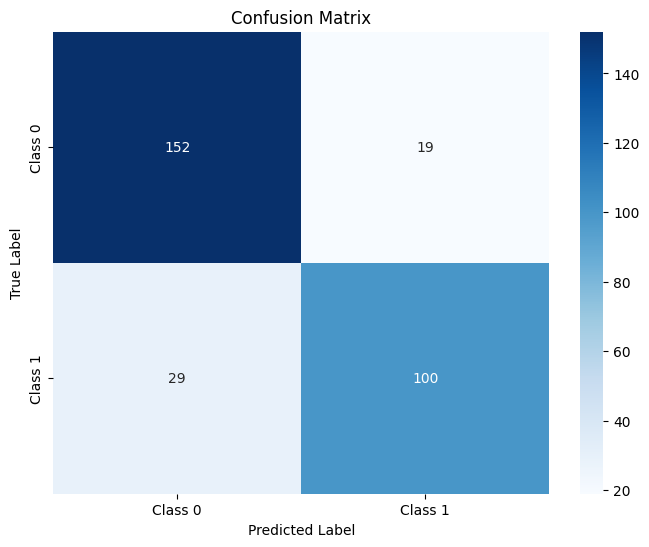

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
# Define feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'
# Ensure the target column exists
if target_column not in data.columns:
    raise ValueError(f"Target column {target_column} not found in the dataset")

# Prepare features and target
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Model Accuracy:
0.9366666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       171
           1       0.94      0.91      0.93       129

    accuracy                           0.94       300
   macro avg       0.94      0.93      0.94       300
weighted avg       0.94      0.94      0.94       300



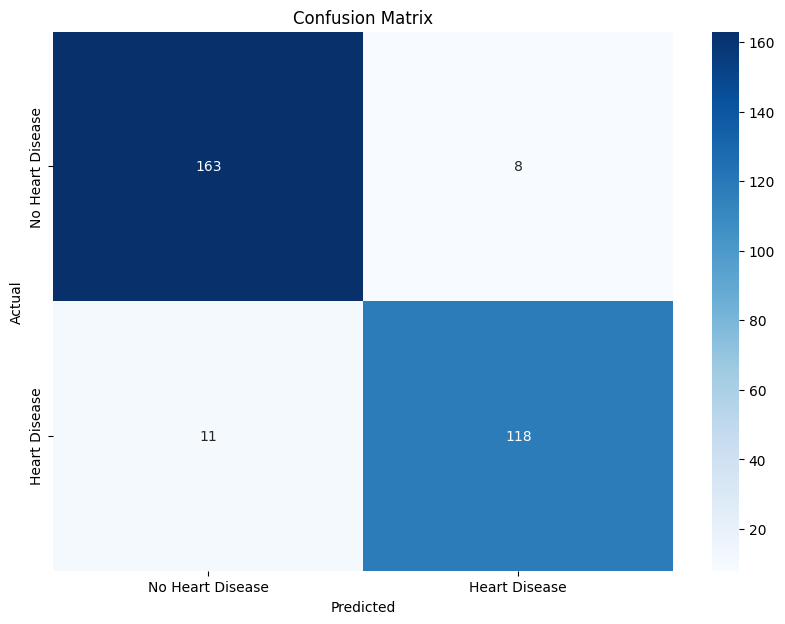

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
# Define feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Ensure the target column exists
if target_column not in data.columns:
    raise ValueError(f"Target column {target_column} not found in the dataset")

# Prepare features and target
X = data[feature_columns]
y = data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for k-NN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the k-NN classifier
model = KNeighborsClassifier(n_neighbors=5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:")
print(accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heart Disease', 'Heart Disease'], yticklabels=['No Heart Disease', 'Heart Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Accuracy: 0.948728246318608
Test Error = 0.1328125
Test Accuracy = 0.8671875


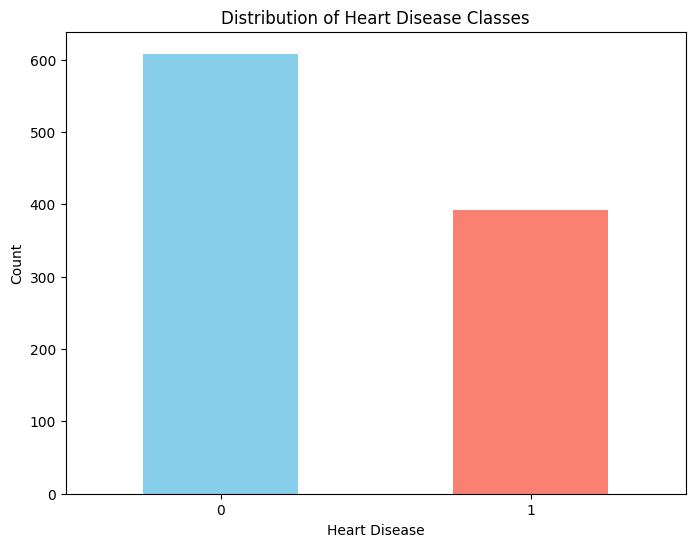

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from sklearn.metrics import roc_curve, auc
from pyspark.sql.functions import col

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("LogisticRegressionExample").getOrCreate()

# Step 2: Load the dataset into a Spark DataFrame
data = spark.read.csv('heart_disease_dataset.csv', header=True, inferSchema=True)

# Step 3: Define the feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Step 4: Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data_assembled = assembler.transform(data)

# Step 5: Prepare the final DataFrame with features and label
data_final = data_assembled.select("features", col(target_column).alias("label"))

# Step 6: Split the data into training and testing sets
train_data, test_data = data_final.randomSplit([0.7, 0.3], seed=42)

# Step 7: Initialize and train the Logistic Regression model
lr = LogisticRegression(labelCol="label", featuresCol="features")
lr_model = lr.fit(train_data)

# Step 8: Make predictions on the test set
predictions = lr_model.transform(test_data)

# Step 9: Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction")
accuracy = evaluator.evaluate(predictions)
print(f"Model Accuracy: {accuracy}")

# Optional: More detailed evaluation
multi_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = multi_evaluator.evaluate(predictions)
print(f"Test Error = {1.0 - accuracy}")
print(f"Test Accuracy = {accuracy}")

# Step 10: Extract prediction probabilities and actual labels for ROC curve
predictions_pd = predictions.select('probability', 'label').toPandas()
predictions_pd['probability'] = predictions_pd['probability'].apply(lambda x: float(x[1]))

# Calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(predictions_pd['label'], predictions_pd['probability'])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
# Optional: Create a bar plot for the distribution of target classes
# Convert Spark DataFrame to Pandas DataFrame for plotting
data_pd = data.select(target_column).toPandas()

# Count the occurrences of each class
class_counts = data_pd[target_column].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Classes')
plt.xticks(ticks=range(len(class_counts.index)), labels=class_counts.index, rotation=0)
plt.show()


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=f5ae463e544776d0c15ce8050cd66333a6e4e54c15e7c90f76f74939f76b867a
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
### evalution metrices:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Initialize Spark session
spark = SparkSession.builder.appName("HeartDiseaseModeling").getOrCreate()

# Assuming `data_cleaned` is your final cleaned pandas DataFrame
data_pandas = data_cleaned

# # Print the columns of the DataFrame to check for correct names
# print("Columns in the DataFrame:", data_pandas.columns)

# Define feature columns and target column based on the DataFrame's actual columns
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Verify columns exist in DataFrame
missing_columns = [col for col in feature_columns + [target_column] if col not in data_pandas.columns]
if missing_columns:
    raise KeyError(f"Missing columns: {missing_columns}")

# Separate features and target
X = data_pandas[feature_columns]
y = data_pandas[target_column]

# Convert to PySpark DataFrame for PySpark modeling
data_pyspark = spark.createDataFrame(data_pandas)

# Define PySpark feature assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_pyspark = assembler.transform(data_pyspark)

# Split the data into training and testing sets for PySpark
train_df, test_df = data_pyspark.randomSplit([0.7, 0.3], seed=42)

# Initialize and train PySpark models
log_reg_pyspark = LogisticRegression(labelCol=target_column, featuresCol='features')
naive_bayes_pyspark = NaiveBayes(labelCol=target_column, featuresCol='features')

# Fit models
log_reg_model = log_reg_pyspark.fit(train_df)
naive_bayes_model = naive_bayes_pyspark.fit(train_df)

# Make predictions
log_reg_predictions = log_reg_model.transform(test_df)
naive_bayes_predictions = naive_bayes_model.transform(test_df)

# Evaluate PySpark models
evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol='prediction', metricName='accuracy')
print("PySpark Logistic Regression Accuracy:", evaluator.evaluate(log_reg_predictions))
print("PySpark Naive Bayes Accuracy:", evaluator.evaluate(naive_bayes_predictions))

# Convert the PySpark test DataFrame back to Pandas for sklearn evaluation
test_pandas = test_df.toPandas()
X_test = test_pandas[feature_columns]
y_test = test_pandas[target_column]

# Initialize and train sklearn models
log_reg = SklearnLogisticRegression()
svc = SVC(probability=True)  # Enable probability estimates
knn = KNeighborsClassifier()

# Fit models
log_reg.fit(X, y)
svc.fit(X, y)
knn.fit(X, y)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)

# Predict probabilities for ROC-AUC
svc_proba = svc.decision_function(X_test)  # SVM may use decision function instead of predict_proba
knn_proba = knn.predict_proba(X_test)[:, 1]  # k-NN probabilities for positive class

# Define evaluation function
def evaluate_sklearn_model(y_true, y_pred, y_proba, model_name):
    print(f"Evaluation metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate sklearn models
evaluate_sklearn_model(y_test, log_reg_pred, log_reg.predict_proba(X_test)[:, 1], "Logistic Regression")
evaluate_sklearn_model(y_test, svc_pred, svc_proba, "SVM")
evaluate_sklearn_model(y_test, knn_pred, knn_proba, "k-NN")


PySpark Logistic Regression Accuracy: 0.8709677419354839
PySpark Naive Bayes Accuracy: 0.7580645161290323
Evaluation metrics for Logistic Regression:
Accuracy: 0.8870967741935484
Precision: 0.8656716417910447
Recall: 0.8285714285714286
F1 Score: 0.8467153284671534
ROC AUC: 0.9635467980295567
Confusion Matrix:
 [[107   9]
 [ 12  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       116
           1       0.87      0.83      0.85        70

    accuracy                           0.89       186
   macro avg       0.88      0.88      0.88       186
weighted avg       0.89      0.89      0.89       186

Evaluation metrics for SVM:
Accuracy: 0.9408602150537635
Precision: 0.9538461538461539
Recall: 0.8857142857142857
F1 Score: 0.9185185185185185
ROC AUC: 0.9874384236453202
Confusion Matrix:
 [[113   3]
 [  8  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.9

PySpark Logistic Regression Accuracy: 0.8709677419354839
PySpark Naive Bayes Accuracy: 0.7580645161290323
PySpark Logistic Regression Feature Importance for Age: 0.2121
PySpark Logistic Regression Feature Importance for Cholesterol: 0.0340
PySpark Logistic Regression Feature Importance for Blood Pressure: 0.0013
PySpark Logistic Regression Feature Importance for Blood Sugar: -0.0020
Evaluation metrics for Logistic Regression:
Accuracy: 0.8870967741935484
Precision: 0.8656716417910447
Recall: 0.8285714285714286
F1 Score: 0.8467153284671534
ROC AUC: 0.9635467980295567
Confusion Matrix:
 [[107   9]
 [ 12  58]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       116
           1       0.87      0.83      0.85        70

    accuracy                           0.89       186
   macro avg       0.88      0.88      0.88       186
weighted avg       0.89      0.89      0.89       186

Evaluation metrics for SVM:
Accura

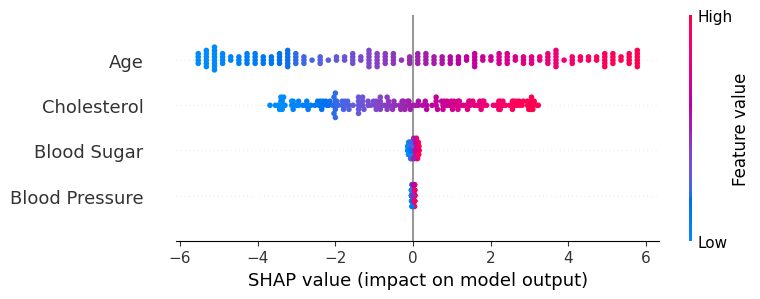

  0%|          | 0/186 [00:00<?, ?it/s]

  0%|          | 0/186 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np
import shap
from lime import lime_tabular

# Initialize Spark session
spark = SparkSession.builder.appName("HeartDiseaseModeling").getOrCreate()

# Assuming `data_cleaned` is your final cleaned pandas DataFrame
data_pandas = data_cleaned

# Define feature columns and target column based on the DataFrame's actual columns
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Separate features and target
X = data_pandas[feature_columns]
y = data_pandas[target_column]

# Convert to PySpark DataFrame for PySpark modeling
data_pyspark = spark.createDataFrame(data_pandas)

# Define PySpark feature assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_pyspark = assembler.transform(data_pyspark)

# Split the data into training and testing sets for PySpark
train_df, test_df = data_pyspark.randomSplit([0.7, 0.3], seed=42)

# Initialize and train PySpark models
log_reg_pyspark = LogisticRegression(labelCol=target_column, featuresCol='features')
naive_bayes_pyspark = NaiveBayes(labelCol=target_column, featuresCol='features')

# Fit models
log_reg_model = log_reg_pyspark.fit(train_df)
naive_bayes_model = naive_bayes_pyspark.fit(train_df)

# Make predictions
log_reg_predictions = log_reg_model.transform(test_df)
naive_bayes_predictions = naive_bayes_model.transform(test_df)

# Evaluate PySpark models
evaluator = MulticlassClassificationEvaluator(labelCol=target_column, predictionCol='prediction', metricName='accuracy')
print("PySpark Logistic Regression Accuracy:", evaluator.evaluate(log_reg_predictions))
print("PySpark Naive Bayes Accuracy:", evaluator.evaluate(naive_bayes_predictions))

# Feature Importance for PySpark Logistic Regression
log_reg_feature_importance = log_reg_model.coefficients.toArray()
for i, col in enumerate(feature_columns):
    print(f"PySpark Logistic Regression Feature Importance for {col}: {log_reg_feature_importance[i]:.4f}")

# Convert the PySpark test DataFrame back to Pandas for sklearn evaluation
test_pandas = test_df.toPandas()
X_test = test_pandas[feature_columns]
y_test = test_pandas[target_column]

# Initialize and train sklearn models
log_reg = SklearnLogisticRegression()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

# Fit models
log_reg.fit(X, y)
svc.fit(X, y)
knn.fit(X, y)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
svc_pred = svc.predict(X_test)
knn_pred = knn.predict(X_test)

# Predict probabilities for ROC-AUC
svc_proba = svc.decision_function(X_test)
knn_proba = knn.predict_proba(X_test)[:, 1]

# Define evaluation function
def evaluate_sklearn_model(y_true, y_pred, y_proba, model_name):
    print(f"Evaluation metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("ROC AUC:", roc_auc_score(y_true, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

# Evaluate sklearn models
evaluate_sklearn_model(y_test, log_reg_pred, log_reg.predict_proba(X_test)[:, 1], "Logistic Regression")
evaluate_sklearn_model(y_test, svc_pred, svc_proba, "SVM")
evaluate_sklearn_model(y_test, knn_pred, knn_proba, "k-NN")

# Feature Importance for Logistic Regression (Scikit-learn)
log_reg_coefficients = log_reg.coef_[0]
importance = np.abs(log_reg_coefficients)
importance = 100.0 * (importance / importance.max())
for i, col in enumerate(feature_columns):
    print(f"Scikit-learn Logistic Regression Feature Importance for {col}: {importance[i]:.2f}%")

# SHAP Interpretation for Logistic Regression
explainer_log_reg = shap.Explainer(log_reg, X)
shap_values_log_reg = explainer_log_reg(X_test)
shap.summary_plot(shap_values_log_reg, X_test, feature_names=feature_columns)

# SHAP Interpretation for SVM and k-NN
explainer_svc = shap.KernelExplainer(svc.predict, X)
shap_values_svc = explainer_svc.shap_values(X_test)
shap.summary_plot(shap_values_svc, X_test, feature_names=feature_columns)

explainer_knn = shap.KernelExplainer(knn.predict, X)
shap_values_knn = explainer_knn.shap_values(X_test)
shap.summary_plot(shap_values_knn, X_test, feature_names=feature_columns)

# LIME Interpretation for one instance
explainer = lime_tabular.LimeTabularExplainer(X.values, feature_names=feature_columns, class_names=['No Disease', 'Disease'], mode='classification')
i = 0
exp = explainer.explain_instance(X_test.iloc[i], log_reg.predict_proba)
exp.show_in_notebook(show_table=True)


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import shap
from lime import lime_tabular

# Initialize Spark session
spark = SparkSession.builder.appName("HeartDiseaseModeling").getOrCreate()

# Assuming `data_cleaned` is your final cleaned pandas DataFrame
data_pandas = data_cleaned

# Define feature columns and target column based on the DataFrame's actual columns
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Separate features and target
X = data_pandas[feature_columns]
y = data_pandas[target_column]

# Convert to PySpark DataFrame for PySpark modeling
data_pyspark = spark.createDataFrame(data_pandas)

# Define PySpark feature assembler
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
data_pyspark = assembler.transform(data_pyspark)

# Split the data into training and testing sets for PySpark
train_df, test_df = data_pyspark.randomSplit([0.7, 0.3], seed=42)

# Initialize and train PySpark Logistic Regression model
log_reg_pyspark = LogisticRegression(labelCol=target_column, featuresCol='features')
log_reg_model = log_reg_pyspark.fit(train_df)

# Initialize and train sklearn models
log_reg = SklearnLogisticRegression()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

# Fit models
log_reg.fit(X, y)
svc.fit(X, y)
knn.fit(X, y)

# Take user input
user_input = {}
user_input['Age'] = float(input("Enter Age: "))
user_input['Cholesterol'] = float(input("Enter Cholesterol level: "))
user_input['Blood Pressure'] = float(input("Enter Blood Pressure: "))
user_input['Blood Sugar'] = float(input("Enter Blood Sugar level: "))

# Convert user input into DataFrame for prediction
user_input_df = pd.DataFrame([user_input])

# Convert user input to PySpark DataFrame for PySpark prediction
user_input_pyspark = spark.createDataFrame(user_input_df)
user_input_pyspark = assembler.transform(user_input_pyspark)

# Predict using PySpark model
pyspark_prediction = log_reg_model.transform(user_input_pyspark).select('prediction').collect()[0][0]

# Predict using sklearn models
log_reg_prediction = log_reg.predict(user_input_df)[0]
svc_prediction = svc.predict(user_input_df)[0]
knn_prediction = knn.predict(user_input_df)[0]

# Display the results
print("\nPrediction Results:")
print(f"PySpark Logistic Regression Prediction: {'Heart Disease' if pyspark_prediction == 1.0 else 'No Heart Disease'}")
print(f"Scikit-learn Logistic Regression Prediction: {'Heart Disease' if log_reg_prediction == 1 else 'No Heart Disease'}")
print(f"SVM Prediction: {'Heart Disease' if svc_prediction == 1 else 'No Heart Disease'}")
print(f"k-NN Prediction: {'Heart Disease' if knn_prediction == 1 else 'No Heart Disease'}")

# Interpret the prediction using SHAP for scikit-learn models
explainer_log_reg = shap.Explainer(log_reg, X)
shap_values_log_reg = explainer_log_reg(user_input_df)
shap.initjs()
shap.force_plot(explainer_log_reg.expected_value, shap_values_log_reg.values[0], user_input_df, feature_names=feature_columns)

# LIME Interpretation for the user input
explainer = lime_tabular.LimeTabularExplainer(X.values, feature_names=feature_columns, class_names=['No Disease', 'Disease'], mode='classification')
exp = explainer.explain_instance(user_input_df.iloc[0], log_reg.predict_proba)
exp.show_in_notebook(show_table=True)


Enter Age: 60
Enter Cholesterol level: 280
Enter Blood Pressure: 190
Enter Blood Sugar level: 160

Prediction Results:
PySpark Logistic Regression Prediction: Heart Disease
Scikit-learn Logistic Regression Prediction: Heart Disease
SVM Prediction: Heart Disease
k-NN Prediction: Heart Disease


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.4 MB/s eta 0:00:00


In [ ]:
# Save the DataFrame to a CSV file
data_cleaned.to_csv('results.csv', index=False)

print("CSV file saved as 'results.csv'")

CSV file saved as 'results.csv'


In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Heart Disease Prediction</title>
    <style>
        body {
            font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
            background-image: url('{{ url_for('static', filename='hospital.jpg') }}');
            background-color: #e6f2ff;
            color: #333;
            margin: 0;
            padding: 0;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-size: cover;
        }
        .container {
            background-color: rgba(255, 255, 255, 0.9);
            padding: 40px;
            border-radius: 15px;
            box-shadow: 0 10px 30px rgba(0, 0, 0, 0.1);
            max-width: 400px;
            width: 100%;
            text-align: center;
        }
        h1 {
            font-size: 26px;
            color: #007acc;
            margin-bottom: 30px;
        }
        form {
            margin-bottom: 25px;
        }
        label {
            display: block;
            margin: 10px 0 5px;
            font-weight: 600;
            color: #555;
        }
        input {
            padding: 12px;
            margin-bottom: 20px;
            width: 100%;
            border: 1px solid #ddd;
            border-radius: 8px;
            box-sizing: border-box;
            font-size: 16px;
            transition: border 0.3s ease;
        }
        input:focus {
            border-color: #007acc;
            outline: none;
        }
        button {
            padding: 14px 0;
            background-color: #007acc;
            color: white;
            border: none;
            border-radius: 8px;
            cursor: pointer;
            width: 100%;
            font-size: 18px;
            font-weight: 600;
            transition: background-color 0.3s ease;
        }
        button:hover {
            background-color: #005f99;
        }
        .result {
            margin-top: 25px;
            background-color: #e6f7ff;
            padding: 20px;
            border-radius: 10px;
            border-left: 5px solid #007acc;
        }
        .result h2 {
            margin-top: 0;
            color: #007acc;
            font-size: 22px;
        }
        .result p {
            margin: 10px 0;
            font-size: 16px;
        }
        .shap-plot img {
            width: 100%;
            border-radius: 10px;
        }
        .lime-explanation {
            margin-top: 25px;
            padding: 20px;
            border-radius: 10px;
            background-color: #f4f4f4;
            border: 1px solid #ddd;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Heart Disease Prediction</h1>
        <form method="POST">
            <label for="age">Age:</label>
            <input type="number" id="age" name="age" min="0" required>

            <label for="cholesterol">Cholesterol:</label>
            <input type="number" id="cholesterol" name="cholesterol" min="0" required>

            <label for="blood_pressure">Blood Pressure:</label>
            <input type="number" id="blood_pressure" name="blood_pressure" min="0" required>

            <label for="blood_sugar">Blood Sugar:</label>
            <input type="number" id="blood_sugar" name="blood_sugar" min="0" required>

            <button type="submit">Predict</button>
        </form>

        {% if prediction %}
        <div class="result">
            <h2>Prediction Results</h2>
            <p><strong>Overall Prediction:</strong> {{ prediction }}</p>
            <p><strong>Percentage of Heart Disease Predictions:</strong> {{ heart_disease_percentage }}%</p>
            <p><strong>Percentage of No Heart Disease Predictions:</strong> {{ no_heart_disease_percentage }}%</p>
        </div>
        {% endif %}

        {% if shap_image_path %}
        <div class="shap-plot">
            <h2>SHAP Explanation</h2>
            <img src="{{ url_for('static', filename='shap_force_plot.png') }}" alt="SHAP Force Plot">
        </div>
        {% endif %}

        {% if lime_html_file %}
        <div class="lime-explanation">
            <h2>LIME Explanation</h2>
            {% include lime_html_file %}
        </div>
        {% endif %}
    </div>
</body>
</html>


In [ ]:
from flask import Flask, request, render_template
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

app = Flask(__name__)

# Load your cleaned data
data_cleaned = pd.read_csv('results.csv')

# Define feature columns and target column
feature_columns = ['Age', 'Cholesterol', 'Blood Pressure', 'Blood Sugar']
target_column = 'Heart Disease'

# Separate features and target
X = data_cleaned[feature_columns]
y = data_cleaned[target_column]

# Initialize and train scikit-learn models
log_reg = LogisticRegression()
svc = SVC(probability=True)
knn = KNeighborsClassifier()

# Fit models
log_reg.fit(X, y)
svc.fit(X, y)
knn.fit(X, y)

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get user inputs from the form
        user_input = {
            'Age': float(request.form['age']),
            'Cholesterol': float(request.form['cholesterol']),
            'Blood Pressure': float(request.form['blood_pressure']),
            'Blood Sugar': float(request.form['blood_sugar'])
        }

        # Convert user input into DataFrame
        user_input_df = pd.DataFrame([user_input])

        # Predict using sklearn models
        log_reg_prediction = log_reg.predict(user_input_df)[0]
        svc_prediction = svc.predict(user_input_df)[0]
        knn_prediction = knn.predict(user_input_df)[0]

        # Count predictions
        predictions = [log_reg_prediction, svc_prediction, knn_prediction]
        num_models = len(predictions)

        # Calculate percentages
        heart_disease_count = predictions.count(1)
        no_heart_disease_count = predictions.count(0)

        heart_disease_percentage = (heart_disease_count / num_models) * 100
        no_heart_disease_percentage = (no_heart_disease_count / num_models) * 100

        # Determine overall prediction
        overall_prediction = max(set(predictions), key=predictions.count)
        overall_result = 'Heart Disease' if overall_prediction == 1 else 'No Heart Disease'

        # Render the template with results
        return render_template('index.html',
                              prediction=overall_result,
                              heart_disease_percentage=heart_disease_percentage,
                              no_heart_disease_percentage=no_heart_disease_percentage)

    return render_template('index.html')

if __name__ == '__main__':
    app.run(debug=True)
